<a href="https://colab.research.google.com/github/Seandaytoy1005/MMO/blob/main/lab3mmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [7]:
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [10]:
iris = load_iris()
data = pd.DataFrame(iris.data,
                      columns=iris.feature_names)
data['Y'] = iris.target
data.shape

(150, 5)

Загрузить набор данных

In [ ]:
# # 加载数据集
# iris = load_iris()
# data = iris.data

# # 使用StandardScaler进行标准化
# scaler_std = StandardScaler()
# data_scaled_std = scaler_std.fit_transform(data)


In [13]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
X_ALL = data.drop('Y', axis=1)

In [14]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Y'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((120, 4), (30, 4))

#Масштабирование функций

StandardScaler

In [15]:
# Обучаем StandardScaler на всей выборке и масштабируем
# 使用StandardScaler进行标准化
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


MinMaxScaler

In [16]:


cs11 = MinMaxScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


Normalizer

In [17]:

# 使用Normalizer进行归一化

cs11 = Normalizer()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


#Обработка выбросов

Используйте коробчатые диаграммы для отображения диапазона и распределения данных для каждого объекта.

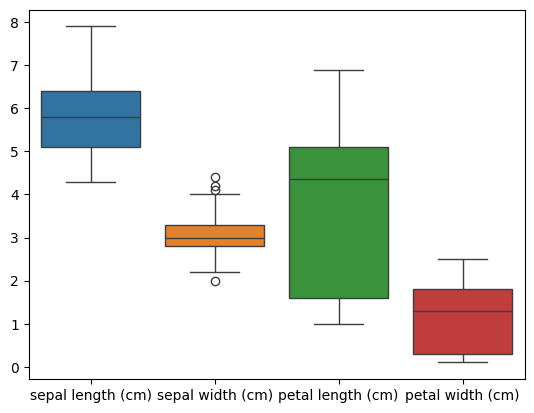

In [18]:
sns.boxplot(data=data.drop(columns='Y'))
plt.show()

Найдите все выбросы и замените их медианой

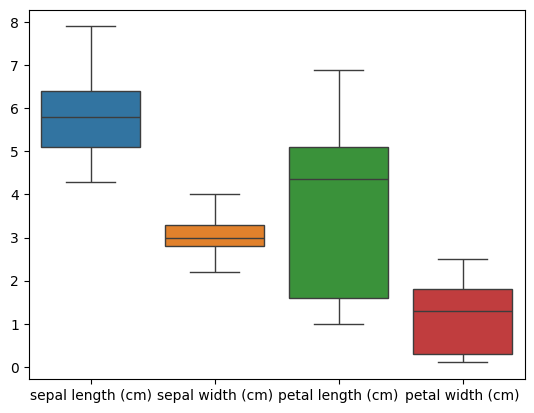

In [19]:
#
for feature in data.columns[:-1]:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[feature] < lower_bound) | (data[feature] > upper_bound)
    data.loc[outliers, feature] = data[feature].median()

# 检查数据集是否还有离群点
sns.boxplot(data=data.drop(columns='Y'))
plt.show()


#обработку по крайней мере одного нестандартного признака

Один из способов построения матрицы TF-IDF по буквам с использованием набора данных 20 групп новостей — это использование N-грамм букв, где N представляет длину последовательности последовательных букв, которые необходимо учитывать. Буквенные N-граммы — это распространенный метод преобразования текста в числовое представление, которое представляет каждый документ в виде вектора.

In [23]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
newsgroups = fetch_20newsgroups(subset='all')
vectorizer = CountVectorizer(ngram_range=(1, 1), analyzer='char')
tf_matrix = vectorizer.fit_transform(newsgroups.data)
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(tf_matrix)
print(tfidf_matrix.shape)


(18846, 125)


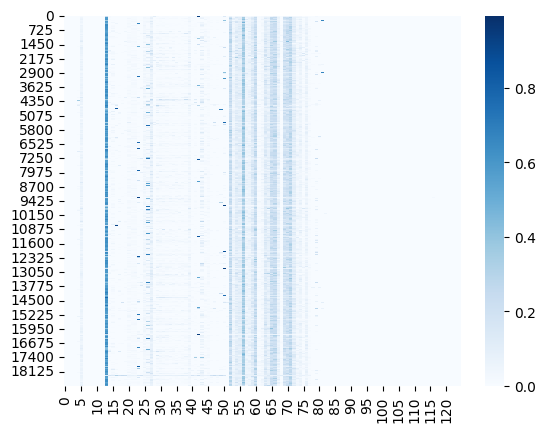

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
tfidf_array = tfidf_matrix.toarray()
sns.heatmap(tfidf_array, cmap='Blues')
plt.show()


#Отбор признаков (Feature selection)

In [30]:
from sklearn.feature_selection import VarianceThreshold

# 创建方差阈值选择对象，设置阈值
selector = VarianceThreshold(threshold=0.1)

# 使用方差阈值选择来拟合和转换特征矩阵
selected_features = selector.fit_transform(X)

# 打印选择的特征
print(selected_features)


[[ 8.3252e+00  4.1000e+01  3.2200e+02 ...  3.7880e+01 -1.2223e+02
   4.5260e+00]
 [ 8.3014e+00  2.1000e+01  2.4010e+03 ...  3.7860e+01 -1.2222e+02
   3.5850e+00]
 [ 7.2574e+00  5.2000e+01  4.9600e+02 ...  3.7850e+01 -1.2224e+02
   3.5210e+00]
 ...
 [ 1.7000e+00  1.7000e+01  1.0070e+03 ...  3.9430e+01 -1.2122e+02
   9.2300e-01]
 [ 1.8672e+00  1.8000e+01  7.4100e+02 ...  3.9430e+01 -1.2132e+02
   8.4700e-01]
 [ 2.3886e+00  1.6000e+01  1.3870e+03 ...  3.9370e+01 -1.2124e+02
   8.9400e-01]]
